In [1]:
from pca_functions import *

In [2]:
df_90 = pd.read_csv(r'D:\vr-pipeline\data\results\28052025_segment_data_t123_90s_1s_ketone.csv')
#df_45= pd.read_csv(r'D:\vr-pipeline\data\results\22052025_segment_data_t123_45s_45s_ketone.csv')
df_30 = pd.read_csv(r'D:\vr-pipeline\data\results\28052025_segment_data_t123_30s_30s_ketone.csv')


df_all = pd.concat([df_90, df_30], ignore_index=True)

In [3]:
df_90_dark_maze=df_90[df_90['trial'] == 15]
#display(df_90)
df_90_pca = df_90_dark_maze.drop(columns=['participant_id', 'center_dist', 'edge_dist','drink', 'session','trial', 'version', 'segment', 'stops_count','unsafe_area_coverage', 'safe_area_coverage', 'safe_time_spent', 'unsafe_time_spent','outside_time_spent'])

#display(df_90_pca.head())

df_90_pca_x_axis= df_90_dark_maze[['drink','session']]
df_90_pca_x_axis.loc[df_90_pca_x_axis['drink'] == 'placebo', 'drink'] = -0.5
df_90_pca_x_axis.loc[df_90_pca_x_axis['drink'] == 'ketone', 'drink'] = 0.5
scaler=StandardScaler()
df_90_pca_scaled=scaler.fit_transform(df_90_pca)
find_num_components_explaining_90variance(df_90_pca_scaled)

No. of components explaining 80 % of the variance in data: 2
No. of components explaining 85 % of the variance in data: 2
No. of components explaining 90 % of the variance in data: 3
No. of components explaining 95 % of the variance in data: 4
No. of components explaining 99 % of the variance in data: 5


In [4]:
df_90_pca_dark_maze_df = pd.DataFrame(df_90_pca_scaled, columns=df_90_pca.columns)
reduced_3_data_90=reduce_data(df_90_pca_dark_maze_df, 3)

Proportion of variance explained by each of the 3 components is: [0.45510161 0.25346011 0.1543753 ]
Total explained variance by 3 components is: 86.2937024702721


In [5]:
reduced_3_data_90_df = pd.DataFrame(reduced_3_data_90, columns=[f'PC{i+1}' for i in range(reduced_3_data_90.shape[1])])

In [6]:
combined_90_dark_maze = pd.concat([
    df_90_dark_maze[['participant_id', 'session', 'drink']].reset_index(drop=True),
    reduced_3_data_90_df[['PC1', 'PC2', 'PC3']].reset_index(drop=True)
], axis=1)

In [7]:
#combined_90_dark_maze.to_csv('../data/pca/combined_90_dark_maze_pca.csv', index=False)

In [8]:
component_weight_90_dark_maze = components_weight(df_90_pca_dark_maze_df, 3)

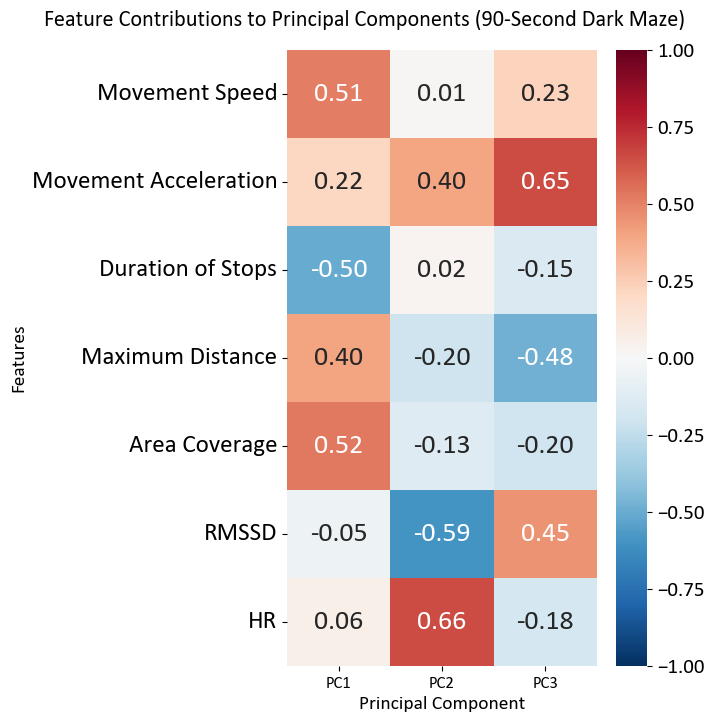

In [10]:
component_weight_90_dark_maze = component_weight_90_dark_maze.rename(
    columns={
        'speed': 'Movement Speed',
        'acceleration': 'Movement Acceleration',
        'stops_duration': 'Duration of Stops',
        'max_distance': 'Maximum Distance',
        'area_covered': 'Area Coverage',
        'rmssd': 'RMSSD',
        'hr': 'HR'
    }
)

# Add title now!

fig, ax=display_pc_weights_1(component_weight_90_dark_maze, is_horizontal=False, save_fig=False)

plt.suptitle("Feature Contributions to Principal Components (90-Second Dark Maze)", fontsize=16, x=0.28, y=0.93)


plt.show()